In [2]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Step 1: Download data using urllib

In [3]:

url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'
data_file = 'co2_mm_mlo.txt'
urllib.request.urlretrieve(url, data_file)

('co2_mm_mlo.txt', <email.message.Message at 0x7c65f3c8e6b0>)

In [4]:
data_file

'co2_mm_mlo.txt'

# Step 2: Data munging to get data into arrays

In [5]:

data = np.genfromtxt(data_file, skip_header=72)
year_month = data[:, 2] + data[:, 3] / 12
co2_levels = data[:, 4]
monthly_averages = data[:, 5]

In [6]:
data

array([[ 1.9590000e+03,  5.0000000e+00,  1.9593699e+03, ...,
        -1.0000000e+00, -9.9900000e+00, -9.9000000e-01],
       [ 1.9590000e+03,  6.0000000e+00,  1.9594548e+03, ...,
        -1.0000000e+00, -9.9900000e+00, -9.9000000e-01],
       [ 1.9590000e+03,  7.0000000e+00,  1.9595370e+03, ...,
        -1.0000000e+00, -9.9900000e+00, -9.9000000e-01],
       ...,
       [ 2.0230000e+03,  5.0000000e+00,  2.0233750e+03, ...,
         3.1000000e+01,  6.9000000e-01,  2.4000000e-01],
       [ 2.0230000e+03,  6.0000000e+00,  2.0234583e+03, ...,
         2.9000000e+01,  5.4000000e-01,  1.9000000e-01],
       [ 2.0230000e+03,  7.0000000e+00,  2.0235417e+03, ...,
         3.1000000e+01,  5.7000000e-01,  2.0000000e-01]])

# Step 3: Plot monthly averages as a function of time

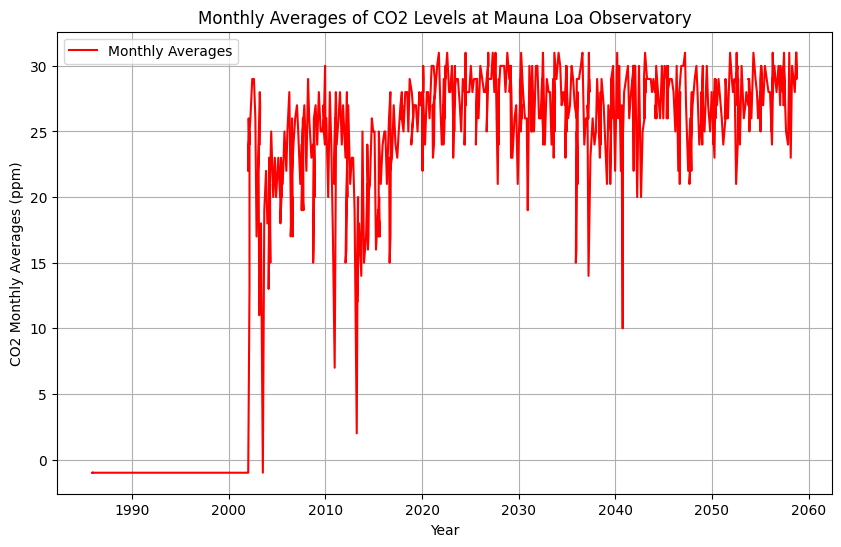

In [11]:

plt.figure(figsize=(10, 6))
plt.plot(year_month, monthly_averages, label='Monthly Averages', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Monthly Averages (ppm)')
plt.title('Monthly Averages of CO2 Levels at Mauna Loa Observatory')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Estimate rate of change of CO2

In [12]:

time_intervals = np.diff(year_month)
co2_rate = np.diff(monthly_averages) / time_intervals

# Step 5: Plot estimated rate of change as a function of time


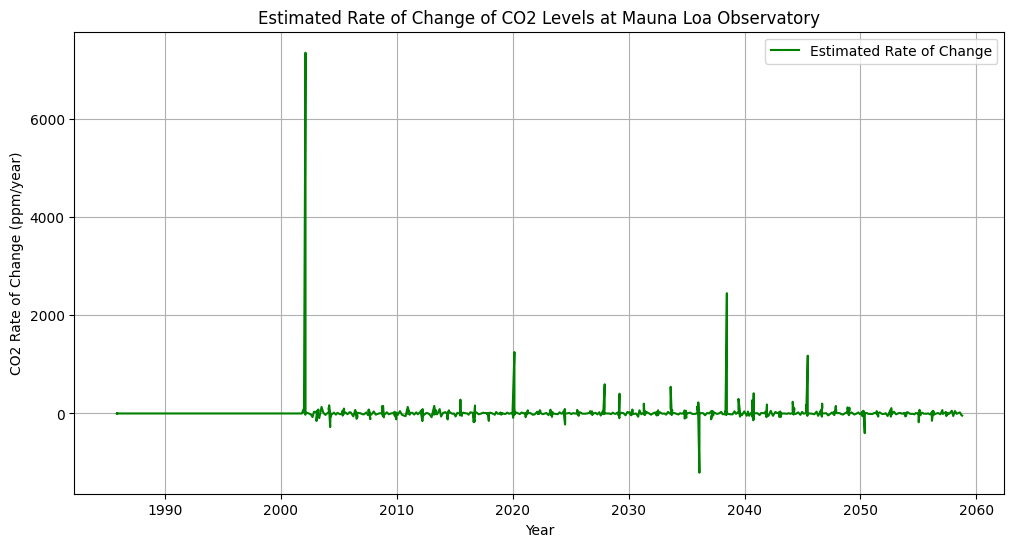

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(year_month[:-1], co2_rate, label='Estimated Rate of Change', color='green')
plt.xlabel('Year')
plt.ylabel('CO2 Rate of Change (ppm/year)')
plt.title('Estimated Rate of Change of CO2 Levels at Mauna Loa Observatory')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Calculate the average rate of change over the entire period

In [15]:

av_rate = np.mean(co2_rate)
print(f"Average Rate of Change of CO2: {av_rate:.4f} ppm/year")

Average Rate of Change of CO2: 20.2178 ppm/year
